In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

Se buscará primero determinar cómo el acceso a Internet a evolucionado a lo largo de los años y cómo el acceso al servicio de Televisión se ha visto afectado, partiendo de la premisa de que desde la llegada de Internet y los servicios de streaming, la Televisión ha decaído y cada vez menos personas la van a adquirir como parte de sus paquetes.
Se cargarán los datos de internet, los cuales se encuentran en el archivo `internet_EDA.ipynb`, como son:
- Las velocidades
- Las tecnologías
- Mbps medios de bajada por provincia
- La penetración de internet por población y hogares
- Ingresos totales

Una vez obtenida y limpiada esta información para el internet, se procederá a revisar la Televisión, en particular:
- Los clientes de TV por provincia 
- La penetración de TV por provincia
- Los ingresos totales
- Las tecnologías usadas para el servicio de TV

In [5]:
accesos_prov_df = pd.read_excel('data/Television.xlsx', sheet_name='Accesos_prov_TV')
ingresos_tv_df = pd.read_excel('data/Television.xlsx', sheet_name='Ingresos_TV')
penetracion_prov_df = pd.read_excel('data/Television.xlsx', sheet_name='Penetracion_prov_TV')

## 1. Limpieza y agrupamientos
De forma análoga al análisis realizado para el Internet, se ralizará la limpieza de los datos para eliminar outliers, elementos vacios que no aportan al análisis y se realizarán luego las agrupaciones necesarias.

In [7]:
accesos_prov_df.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción (Vrf)
0,2024,1,Buenos Aires,3000167
1,2024,1,Capital Federal,705786
2,2024,1,Catamarca,51061
3,2024,1,Chaco,116721
4,2024,1,Chubut,77969


In [8]:
accesos_prov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Año                               984 non-null    int64 
 1   Trimestre                         984 non-null    int64 
 2   Provincia                         984 non-null    object
 3   Accesos TV por suscripción (Vrf)  984 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 30.9+ KB


In [9]:
ingresos_tv_df.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2024,1,1.907872e+08,94270533.93
1,2023,4,1.335822e+08,64748818.98
2,2023,3,1.037380e+08,51179479.92
3,2023,2,8.701537e+07,38625145.74
4,2023,1,7.473935e+07,33430741.33


In [10]:
ingresos_tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Año                                        41 non-null     int64  
 1   Trimestre                                  41 non-null     int64  
 2   Ingresos TV por suscripción  (miles de $)  41 non-null     float64
 3   Ingresos TV satelital (miles de $)         41 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [11]:
penetracion_prov_df.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Accesos TV por suscripción por cada 100 hogares
0,2024,1,Buenos Aires,16.53,48.24
1,2024,1,Capital Federal,22.88,56.07
2,2024,1,Catamarca,11.93,46.89
3,2024,1,Chaco,9.37,35.04
4,2024,1,Chubut,11.89,38.78


In [12]:
penetracion_prov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              984 non-null    int64  
 1   Trimestre                                        984 non-null    int64  
 2   Provincia                                        984 non-null    object 
 3   Accesos TV por suscripción por cada 100 hab      984 non-null    float64
 4   Accesos TV por suscripción por cada 100 hogares  984 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 38.6+ KB


De los dataframes creados se puede ver que no hay valores duplicados o faltantes. Todas las filas contienen todos los datos y con su correspondiente data type, sin embargo se realiza una limpieza básica y unas cuantas transformaciones para analizar los valores después

In [19]:
# Se renombran las columnas para una mejor consistencia y limpieza
accesos_prov_df.columns = ['Año', 'Trimestre', 'Provincia', 'Accesos_TV_por_suscripcion']
ingresos_tv_df.columns = ['Año', 'Trimestre', 'Ingresos_TV_suscripcion_miles', 'Ingresos_TV_satelital_miles']
penetracion_prov_df.columns = ['Año', 'Trimestre', 'Provincia', 'Accesos_TV_por_suscripcion_por_100_hab', 'Accesos_TV_por_suscripcion_por_100_hogares']

# Se convierten las columnas de valores monetarios a numéricas en caso de ser necesario
ingresos_tv_df['Ingresos_TV_suscripcion_miles'] = pd.to_numeric(ingresos_tv_df['Ingresos_TV_suscripcion_miles'], errors='coerce')
ingresos_tv_df['Ingresos_TV_satelital_miles'] = pd.to_numeric(ingresos_tv_df['Ingresos_TV_satelital_miles'], errors='coerce')

In [16]:
# Se verifican y eliminan duplicados si existen
accesos_prov_df.drop_duplicates(inplace=True)
ingresos_tv_df.drop_duplicates(inplace=True)
penetracion_prov_df.drop_duplicates(inplace=True)

In [17]:
# Se verifica si existen provincias con diferentes nombres para la misma entidad (inconsistencias)
provincias_accesos = accesos_prov_df['Provincia'].unique()
provincias_penetracion = penetracion_prov_df['Provincia'].unique()

In [18]:
# Unificar listas de provincias para asegurar consistencia
provincias_unicas = sorted(set(provincias_accesos).union(set(provincias_penetracion)))
provincias_unicas

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

Se puede observar aquí que por ejemplo 'Santiago Del Estero' y 'Santiago del Estero' presentan una inconsistencia, al igual que con 'Tierra Del Fuego' y 'Tierra del Fuego'.

In [20]:
# Se normalizan los nombres de provincias para asegurar consistencia
accesos_prov_df['Provincia'] = accesos_prov_df['Provincia'].replace({
    'Santiago Del Estero': 'Santiago del Estero',
    'Tierra Del Fuego': 'Tierra del Fuego'
})

penetracion_prov_df['Provincia'] = penetracion_prov_df['Provincia'].replace({
    'Santiago Del Estero': 'Santiago del Estero',
    'Tierra Del Fuego': 'Tierra del Fuego'
})


In [24]:
# Se verifica la normalización
provincias_accesos_normalizadas = accesos_prov_df['Provincia'].unique()
provincias_penetracion_normalizadas = penetracion_prov_df['Provincia'].unique()

In [25]:
# Se combinan las listas de provincias normalizadas
provincias_unicas_normalizadas = sorted(set(provincias_accesos_normalizadas).union(set(provincias_penetracion_normalizadas)))
provincias_unicas_normalizadas

['Buenos Aires',
 'Capital Federal',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

Con lo anterior se da por finalizada la limpieza de los datos para la televisión

## 2. Análisis Exploratorio

#### Acceso a TV por Provincia a través de los años

Una vez hechas las transformaciones requeridas, se procede a analizar los datos a fin de entender cómo se ha comportado la TV. Se comienza con el acceso al servicio de televisión por suscripción por cada provincia a lo largo de los años.

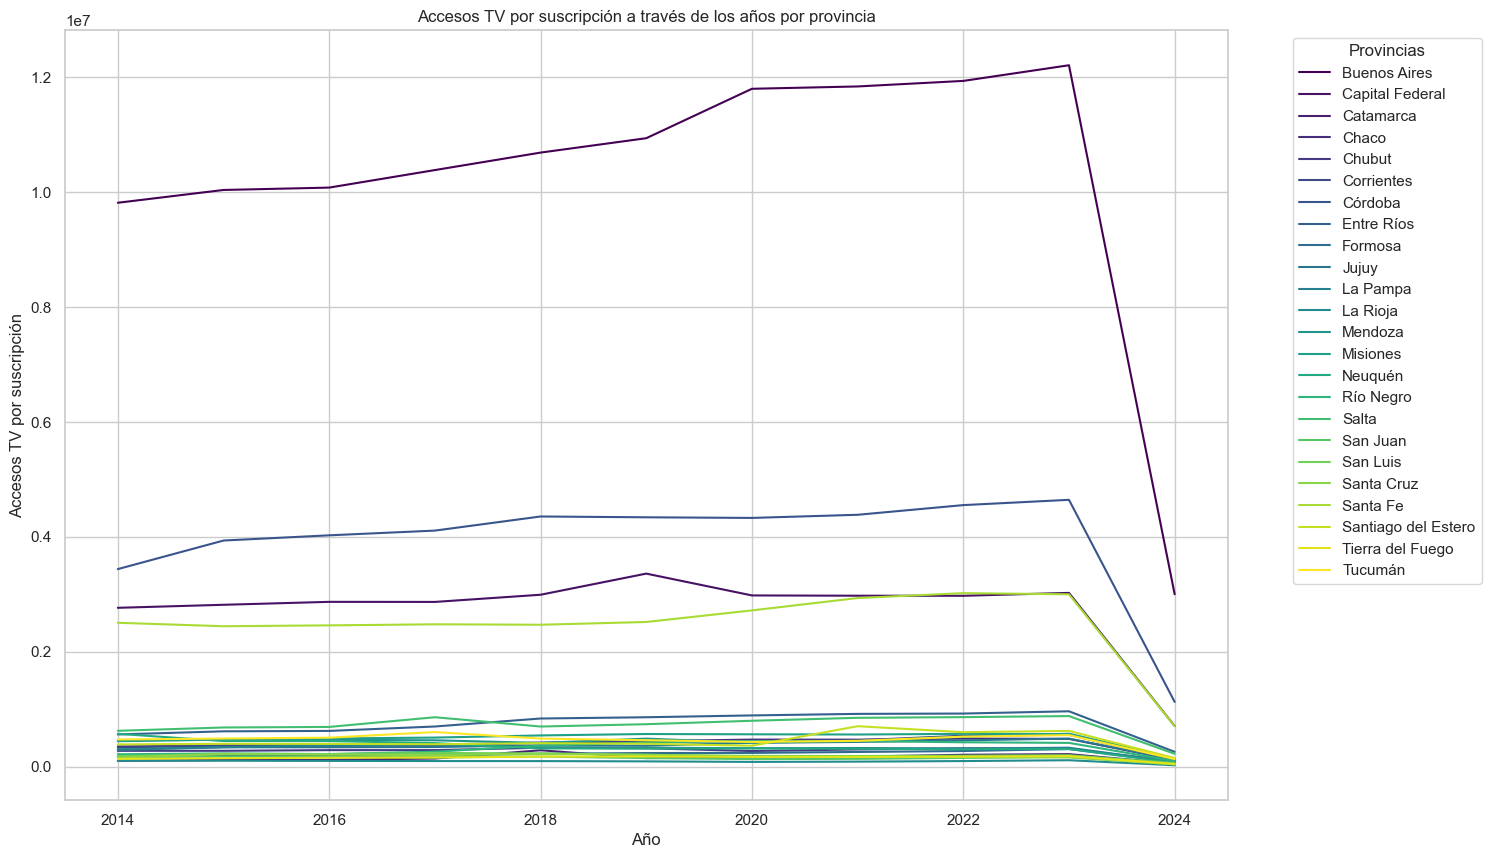

In [28]:
accesos_anuales_prov = accesos_prov_df.groupby(['Año', 'Provincia'])['Accesos_TV_por_suscripcion'].sum().unstack()

# Se crea un gráfico de Accesos TV por suscripción a través de los años para cada provincia
accesos_anuales_prov.plot(kind='line', colormap='viridis', figsize=(15, 10))
plt.title('Accesos TV por suscripción a través de los años por provincia')
plt.ylabel('Accesos TV por suscripción')
plt.xlabel('Año')
plt.legend(title='Provincias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Del anterior gráfico puede verse como el servicio de TV fue un servicio con un acceso bastante estable a lo largo de los años, sin embargo, hay una caída bastante abrupta alrededor de 2023-2024. Esto puede deberse a un mayor número de servicios de streaming, donde durante años se tuvo solo a Netflix, sin embargo en los últimos años se dio un apogeo con otros competidores como Disney+, MAX, Paramount+, Hulu TV, entreo otros. Sin embargo, como se verá más adelante con el análisis de los ingresos, aunque parece haber una caída entre 2023-2024, los ignresos de la TV fueron los más altos durante dicho periodo

#### Se sigue ahora con un análisis de la penetración de la TV por provincia

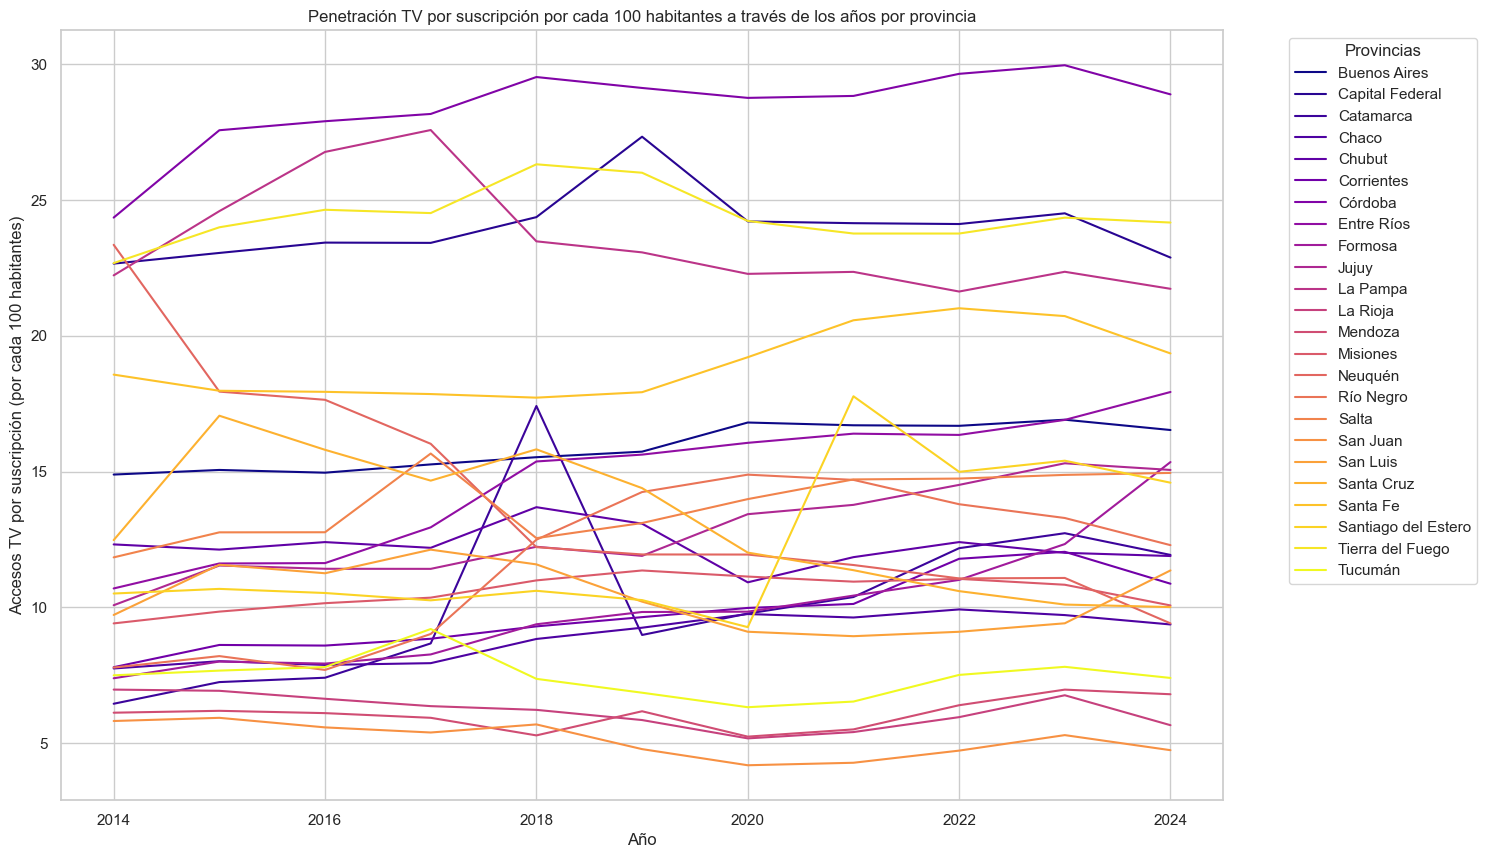

In [29]:
# Análisis de Penetración TV por provincia a través de los años
penetracion_anual_prov = penetracion_prov_df.groupby(['Año', 'Provincia'])['Accesos_TV_por_suscripcion_por_100_hab'].mean().unstack()

# Gráfico de penetración TV por suscripción por cada 100 habitantes a través de los años
penetracion_anual_prov.plot(kind='line', colormap='plasma', figsize=(15, 10))
plt.title('Penetración TV por suscripción por cada 100 habitantes a través de los años por provincia')
plt.ylabel('Accesos TV por suscripción (por cada 100 habitantes)')
plt.xlabel('Año')
plt.legend(title='Provincias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Puede apreciarse que, sin tener en cuenta ciertos picos y caídas abruptas, la penetración de la TV ha sido prácticamente la misma desde 2014, con un leve crecimiento hasta 2024, pero siendo en muchos casos una línea que prácticamente inicia y acaba en el mismo valor.

#### Se sigue ahora con los ingresos anuales de la Televisión

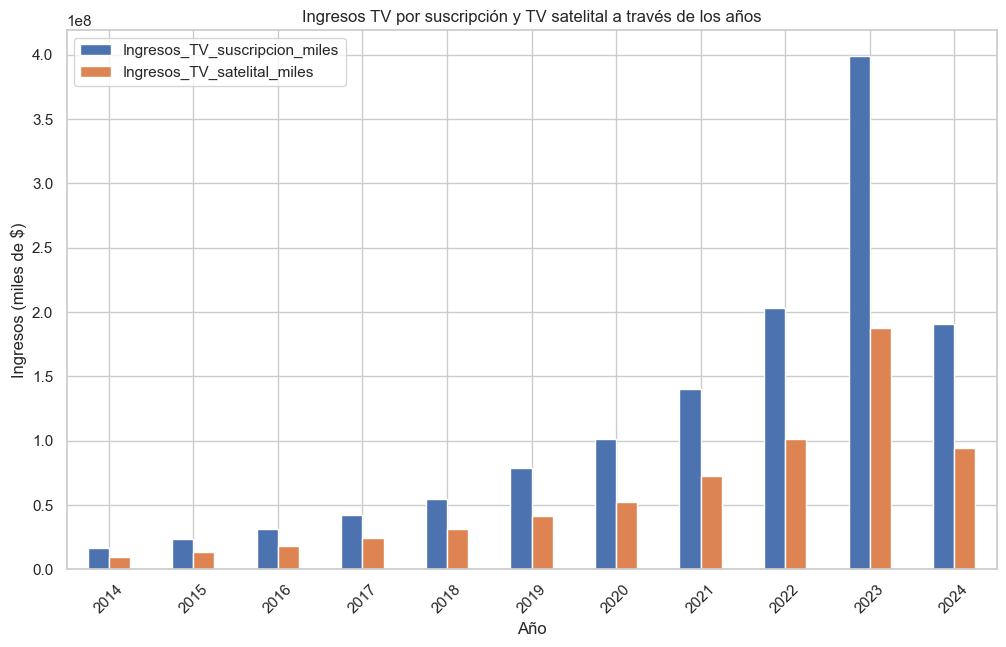

In [31]:
# Análisis de Ingresos TV por suscripción a través de los trimestres y años
ingresos_anuales = ingresos_tv_df.groupby(['Año'])[['Ingresos_TV_suscripcion_miles', 'Ingresos_TV_satelital_miles']].sum()

# Se crea otro gráfico para los ingresos por suscripción y satelital
ingresos_anuales.plot(kind='bar', figsize=(12, 7))
plt.title('Ingresos TV por suscripción y TV satelital a través de los años')
plt.ylabel('Ingresos (miles de $)')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El gráfico es claro, el mejor año para el servicio de TV, tanto satelital como por cable, fue 2023. Es interesante ver como en lo corrido de 2024 los valores están prácticamente a la par de los de 2022.

Se pueden tener varias causas que expliquen lo anterior, aunque se podría resumir en lo siguiente:

1. Crecimiento Exponencial:

- A partir de 2020, se observa un crecimiento significativo en los ingresos, con un aumento mucho más pronunciado hacia 2022 y 2023.
- Este crecimiento podría estar impulsado por un aumento en el número de suscriptores, la migración a planes de mayor velocidad y precio, o ajustes inflacionarios y de precios en el mercado.

2. Estabilidad Pre-2020:

- Entre 2014 y 2019, los ingresos totales muestran un crecimiento moderado y estable, con pequeñas fluctuaciones. Esto sugiere un crecimiento a un ritmo más lento, quizás asociado con una tasa de adopción de nuevos usuarios más baja durante esos años.

3. Impacto de la Pandemia:

- El cambio de tendencia a partir de 2020 podría estar relacionado con la pandemia de COVID-19. Durante este periodo, la demanda de internet creció de manera significativa debido al teletrabajo, la educación en línea y el entretenimiento en casa, lo que llevó a un incremento en la cantidad de usuarios, así como una preferencia por planes de mayor velocidad y ancho de banda.

4. Picos y Descensos:

- A pesar del crecimiento general, se observan pequeños picos y caídas en los ingresos. Estos podrían estar asociados con factores estacionales, cambios en precios o promociones, o fluctuaciones en la cantidad de suscripciones activas.

## 3. Exportación de los datos
 Una vez analizados los datos de la Televisión y entendido de forma general cómo ha sido su comportamiento, se exportan los datos para posteriormente realizar el dashboard en PowerBI

In [32]:
accesos_anuales_prov.to_csv('EDA_CSV_Limpios/accesos_anuales_prov_TV.csv')
penetracion_anual_prov.to_csv('EDA_CSV_Limpios/penetracion_anual_prov_TV.csv')
ingresos_anuales.to_csv('EDA_CSV_Limpios/ingresos_anuales_TV.csv')